In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep  7 17:45:19 2017

@author: matt
"""
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import numpy as np
import scipy
#import pyvcf


# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from itertools import izip as zip, count # izip for maximum efficiency

rowCount=0
with open('/home/matt/genotype_report_080817.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        if rowCount==0:
            alldata = []                                   
            colVals=row
            #find when assays start
            indexAssaystart1=row.index('C__25986767_70')
            #find when SNPs start
            indexSNPstart1=row.index('rs5030865')
            indexAssaystart2=row.index('C__26544178_30')
            indexSNPstart2=row.index('CYP2C19*10/680C>T')
            indexCNVstart=row.index('Hs04502391_cn')
        else:
            alldata.append(row)
        colCount=len(row)
        rowCount=rowCount+1
 

    #sort column values for easy comparison
labelSorted=sorted(colVals)        
diagCodes=np.zeros((rowCount,indexAssaystart1))
genoCodes=np.zeros((rowCount,len(colVals)-indexAssaystart1))

# could fix and make more efficient to fill diagCodes
# diagCodes=[all(tuple) for tuple in zip(*alldata)]

#transpose list to easily access column data   
categoryData=map(list, zip(*alldata))

#get unique elements of each column
els=[]
for test in categoryData:
    els.append(set(test))

rowNum=0
for row in alldata:                    
    colNum=0
    for col in row[0:indexAssaystart1-1]:
        if col=='TRUE':
            diagCodes[rowNum,colNum]=int(col == 'TRUE')
        colNum=colNum+1

    for col in row[1111:]:
        if col=='none':
            genoCodes[rowNum,colNum-indexAssaystart1]=0
        else:
            genoCodes[rowNum,colNum-indexAssaystart1]=1
            

        colNum=colNum+1

    rowNum=rowNum+1



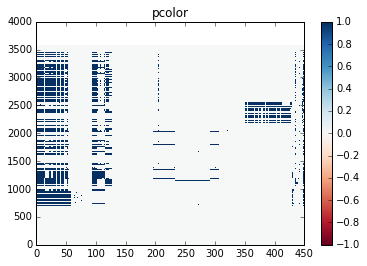

ValueError: Colormap rb is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

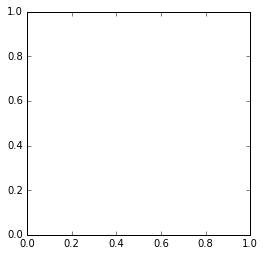

In [9]:
%matplotlib inline
#plot test/patient organization
# y, x = np.mgrid[slice(-3, 3 + dy, dy),slice(-3, 3 + dx, dx)]
plt.pcolor(genoCodes, cmap='RdBu', vmin=-1, vmax=1)
plt.title('data present')
# set the limits of the plot to the limits of the data
# plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.show()

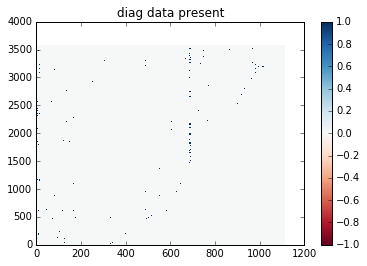

In [10]:
plt.pcolor(diagCodes, cmap='RdBu', vmin=-1, vmax=1)
plt.title('diag data present')
plt.colorbar()
plt.show()


In [3]:
#list of geno tests
#1:128 1111:1239 - assays, multiple responses
#139:197 1240-1308 - allele/none
#197:235 more assays 
#235:273 SNPs 1346-
#274 1385: something different. col title '',  results {'1.2', '1.71', '2.11', '2.15', '2.74', 'SRB71', 'none'}
#275:292 more SNPs to 1403
#293:308 15 more assays
#bunch more allele/none
#another chunk of assays
#last 19: CNVs    

# allele=[];
# for i in alldata:
#     allele.append(i[-19])
# print allele

# #groupings found in thermofisher pharmacogenomics guide 

# # 3 versions of same info?
# print els[colVals.index('CYP2C19*2/681G>A')]
# print els[colVals.index('rs4244285')]
# print els[colVals.index('C__25986767_70')]

# #are these different tests? is data same?
# print els[colVals.index('CYP2C19*10/680C>T')]
# print els[colVals.index('CYP2C19*10/c.680C>T')]
# print els[colVals.index('rs6413438')]
# print els[colVals.index('C__30634128_10')]

# #are these different tests? same data?
# print els[colVals.index('CYP2C19*17/-806C>T')]
# print els[colVals.index('CYP2C19*17/g.-806C>T')]

# print els[colVals.index('C_11711720D_40')]
# print els[colVals.index('C_11711720C_30')]

# print els[colVals.index('C__25625804_10')]
# print els[colVals.index('C_25625804D_20')]

# print els[colVals.index('rs5030865')]
# print els[colVals.index('C_30634117C_K0')]
# print els[colVals.index('C_30634117D_M0')]



In [8]:
#which patients have different geno tests?
dataPresent= np.where(genoCodes[:]==1)
#the ones that have any tests done
usegenoPts=set(dataPresent[0])
#the tests that have any patient data
usegenoCodes=set(dataPresent[1])
usegenoCodes=[val for val in usegenoCodes]

#which patients have diagnoses?
dataPresent= np.where(diagCodes[:]==1)
#the ones that have any diagnoses
usediagPts=set(dataPresent[0])
#the diagnoses that have any patients
usediagCodes=set(dataPresent[1])
usediagCodes=[val for val in usediagCodes]

#overlap between patients that have both any geno testing and any diagnosis 
overlapPts = [val for val in usegenoPts if val in usediagPts]

# #last patient in this overlap set seems to have most tests done
# lastPt=overlapPts[len(overlapPts)-1]
# inds=np.where(genoCodes[lastPt])
# usegenoCodes_most=[val for val in inds[0]]
# usegenoCodes_most=usegenoCodes[]

useRows=overlapPts
data=genoCodes

#slow for large data >1000 of rows*cols
# set the limits of the plot to the limits of the data

# y, x = np.mgrid[0:len(useRows),0:len(usegenoCodes)]
#how many patients per genotest?
histTestsperPatient=sum(np.transpose(genoCodes[overlapPts]))
#how many geno tests per patient?
histPatientsperTest=sum(genoCodes[overlapPts])
testIndex=sorted(range(len(histPatientsperTest)), key=vals.__getitem__)

numPts=[]
for num in range(0,len(histPatientsperTest)):
    numPts.append(len(np.where(histTestsperPatient==num)[0]))

testn=0
for n in numPts:
    if n==max(numPts):
        numTestsmax=testn
    testn=testn+1
#65 tests run in 672 patients
    
print [max(numPts),'patients with',numTestsmax,'genetic tests performed']

usePt=[]
useTests=[]
ptind=0
for pt in histTestsperPatient:
    if pt==numTestsmax:
        usePt.append(ptind)
        useTests.append(overlapPts[ptind])
    ptind=ptind+1
    
    
plt.pcolor(data[overlapPts[usePt]], cmap='RdBu', vmin=-1, vmax=1)
plt.title('pcolor')
plt.colorbar()
plt.show()



#find which 65 tests were run in these 672 patients

# import seaborn as sns; sns.set(color_codes=True)
# iris = sns.load_dataset("iris")
# species = iris.pop("species")
# g = sns.clustermap(iris)

# numGenTests=len(['APOE/2', 'APOE/4', 'COMT/696G>A', 'CYP1A2*1K/g.-729C>T', 'CYP1A2/c.-2467delT', 'CYP1A2/g.-163C>A', 'CYP1A2/g.-3860G>A', 'CYP1A2/g.-739T>G', 'CYP2B6*16/*18/c.983T>C', 'CYP2B6*22/g.-82T>C', 'CYP2B6*5/*7/c.1459C>T', 'CYP2B6*9/516G>T', 'CYP2B6/c.1459C>T', 'CYP2B6/c.983T>C', 'CYP2C19*10/680C>T', 'CYP2C19*10/c.680C>T', 'CYP2C19*13/87290C>T', 'CYP2C19*17/-806C>T', 'CYP2C19*17/g.-806C>T', 'CYP2C19*2/681G>A', 'CYP2C19*2/c.681G>A', 'CYP2C19*3/636G>A', 'CYP2C19*3/c.636G>A', 'CYP2C19*4/c.1A>G', 'CYP2C19*4/c1A>G', 'CYP2C19*5/1297C>T', 'CYP2C19*5/c.1297C>T', 'CYP2C19*5A/c.1297C>T', 'CYP2C19*6/395G>A', 'CYP2C19*6/c.395G>A', 'CYP2C19*7/19294T>A', 'CYP2C19*7/g.19294T>A', 'CYP2C19*8/358T>C', 'CYP2C19*8/c.358T>C', 'CYP2C19*9/c.431G>A', 'CYP2C19*9/c431G>A/g12784G>A', 'CYP2C9*11/c.1003C>T', 'CYP2C9*11A/c.1003C>T', 'CYP2C9*18/c.1075A>C', 'CYP2C9*2/c.430C>T', 'CYP2C9*2/c430C>T', 'CYP2C9*2A/c.430C>T', 'CYP2C9*3/*18/c.1075A>C', 'CYP2C9*3/1075A>C', 'CYP2C9*4/c.1076T>C', 'CYP2C9*5/c.1080C>G', 'CYP2C9*6/c.818delA', 'CYP2D6', 'CYP2D6  ', 'CYP2D6  RnaseP', 'CYP2D6 CNV', 'CYP2D6 EX9', 'CYP2D6*10/100C>T', 'CYP2D6*10/g.100C>T', 'CYP2D6*11/883G>C', 'CYP2D6*11/g.2850C>T', 'CYP2D6*12/g.124G>A', 'CYP2D6*12/g124G>A', 'CYP2D6*14/1758G>A', 'CYP2D6*14/g.1758G>A', 'CYP2D6*15/g137-138insT', 'CYP2D6*17/1023C>T', 'CYP2D6*17/g.1023C>T', 'CYP2D6*29/g.3183G>A', 'CYP2D6*2A/-1584C/G', 'CYP2D6*3/2549delA', 'CYP2D6*3/g.2549delA', 'CYP2D6*3A/g.2549delA', 'CYP2D6*4*10/g.100C>T', 'CYP2D6*4/1846G>A', 'CYP2D6*4/g.1846G>A', 'CYP2D6*41/2988G>A', 'CYP2D6*41/g.2988G>A', 'CYP2D6*4A/g.1846G>A', 'CYP2D6*6/1707T>del', 'CYP2D6*6/g.1707T>del', 'CYP2D6*6A/g.1707T>del', 'CYP2D6*7/2935A>C', 'CYP2D6*7/g.2935A>C', 'CYP2D6*8/1758G>T', 'CYP2D6*8/g.1758G>A', 'CYP2D6*8/g.1758G>T', 'CYP2D6*9/g.2613_2615delAGA', 'CYP2D6*9/g2613_2615delAGA', 'CYP2D6/2850C>T', 'CYP2D6/4180G>C', 'CYP2D6/g.2850C>T', 'CYP2D6/g.4180G>C', 'CYP2D6_G1661C_1659G', 'CYP2D6_INTRON2', 'CYP2D6g.2850C>T', 'CYP3A4*12/21896 C>T', 'CYP3A4*12/g.21896C>T', 'CYP3A4*17/15615 T>C', 'CYP3A4*17/c.566 T>C', 'CYP3A4*1B/g.-392A>G', 'CYP3A4*2/15713T>C', 'CYP3A4*2/c.664T>C', 'CYP3A4*22/15389C>T', 'CYP3A4*3/23171T>C', 'CYP3A4*3/c.1334T>C', 'CYP3A41B/A>G', 'CYP3A5*1D/g31611C>T', 'CYP3A5*2/27289 C>A', 'CYP3A5*2/g.27289C>A', 'CYP3A5*3/*10/g.6986A>G', 'CYP3A5*3/6986A>G', 'CYP3A5*3/g.6986A>G', 'CYP3A5*3B/g.3705C>T', 'CYP3A5*3B/g3705C>T', 'CYP3A5*6/14690G>A', 'CYP3A5*6/g.14690G>A', 'CYP3A5*7/27131_27132insT', 'CYP3A5*7/g.27131_27132insT', 'CYP3A5*8/3699C>T', 'CYP3A5*8/g.3699C>T', 'CYP3A5*9/19386 G>A', 'CYP3A5*9/g.19386G>A'])
# numAssays=len(['C_11711720C_30', 'C_11711720D_40', 'C_25625804D_20', 'C_30634117C_20', 'C_30634117C_K0', 'C_30634117D_30', 'C_30634117D_M0', 'C_30634128A_60', 'C_3063FH117C_K0', 'C_3063FH117D_M0', 'C_3063FH2117C_K0', 'C_3063FH2117D_M0', 'C_990000001_10', 'C__11484460_40', 'C__11510543_20', 'C__11592758_10', 'C__11710096_10', 'C__11904666_10', 'C__11975250_10', 'C__11FH28FH2FH260_FH20', 'C__11FH8FHFH60_FH0', 'C__12091550_20', 'C__12091552_30', 'C__15854163_70', 'C__15859191_30', 'C__15867697_10', 'C__16017734_10', 'C__1601773FH2_10', 'C__1601773FH_10', 'C__16026001_20', 'C__16179493_40', 'C__25594209_10', 'C__25625782_20', 'C__25625804_10', 'C__25625805_10', 'C__25745302_30', 'C__25746809_50', 'C__25761568_20', 'C__257FH25302_30', 'C__257FH26809_50', 'C__257FH5302_30', 'C__257FH6809_50', 'C__25982233_10', 'C__25986767_70', 'C__26201809_30', 'C__26544178_30', 'C__27028164_10', 'C__27102414_10', 'C__27102425_10', 'C__27102431_D0', 'C__27102FH1FH_10', 'C__27102FH21FH2_10', 'C__27102FH225_10', 'C__27102FH231_D0', 'C__27102FH25_10', 'C__27102FH31_D0', 'C__27104892_10', 'C__2710FH2892_10', 'C__2710FH892_10', 'C__27465000_10', 'C__27481932_10', 'C__27488117_10', 'C__27531552_A0', 'C__27531918_10', 'C__27535825_20', 'C__27830964_10', 'C__2783096FH2_10', 'C__2783096FH_10', 'C__27859817_40', 'C__27859817_FH0', 'C__27859817_FH20', 'C__27859822_10', 'C__27861808_60', 'C__27861809_10', 'C__27861810_10', 'C__28947992_10', 'C__29400109_10', 'C__30016089_10', 'C__30203950_10', 'C__30204875_10', 'C__30216836_10', 'C__30403261_20', 'C__30633862_10', 'C__30633863_10', 'C__30633871_50', 'C__30633872_10', 'C__30633906_10', 'C__30634034_10', 'C__30634116_20', 'C__30634118_A0', 'C__30634124_10', 'C__30634127_10', 'C__30634128_10', 'C__30634130_30', 'C__30634131_20', 'C__30634132_70', 'C__30634136_10', 'C__30634146_10', 'C__30634202_10', 'C__30634204_10', 'C__30634242_40', 'C__3063FH127_10', 'C__3063FH128_10', 'C__3063FH130_30', 'C__3063FH131_20', 'C__3063FH132_70', 'C__3063FH136_10', 'C__3063FH1FH6_10', 'C__3063FH202_10', 'C__3063FH20FH_10', 'C__3063FH2127_10', 'C__3063FH2128_10', 'C__3063FH2130_30', 'C__3063FH2131_20', 'C__3063FH2132_70', 'C__3063FH2136_10', 'C__3063FH21FH26_10', 'C__3063FH2202_10', 'C__3063FH220FH2_10', 'C__3063FH22FH22_FH20', 'C__3063FH2FH2_FH0', 'C__30FH03261_20', 'C__30FH203261_20', 'C__31263380_10', 'C__32287188_10', 'C__32287221_20', 'C__32388575_30', 'C__32388575_A0', 'C__32407229_60', 'C__32407232_50', 'C__32407243_20', 'C__32407252_30', 'C__32FH07229_60', 'C__32FH07232_50', 'C__32FH072FH3_20', 'C__32FH207229_60', 'C__32FH207232_50', 'C__32FH2072FH23_20', 'C__34816113_20', 'C__34816116_20', 'C__3FH2816113_20', 'C__3FH2816116_20', 'C__3FH816113_20', 'C__3FH816116_20', 'C__59013445_10', 'C__60142977_10', 'C__601FH22977_10', 'C__601FH2977_10', 'C__60731447_10', 'C__60732328_20', 'C___1202883_20', 'C___1314213_10', 'C___1619749_10', 'C___1642455_10', 'C___1837671_40', 'C___1837671_50', 'C___1901697_20', 'C___1980090_20', 'C___2084764_20', 'C___2138789_10', 'C___2222771_40', 'C___2222771_A0', 'C___2431871_30', 'C___2431875_10', 'C___2737970_10', 'C___3020071_10', 'C___3084793_20', 'C___7455701_10', 'C___7486599_20', 'C___7486676_10', 'C___7586657_20', 'C___7586662_10', 'C___7611979_10', 'C___7817765_60', 'C___7820464_10', 'C___8303531_40', 'C___8692805_10', 'C___8695278_10', 'C___8726802_20', 'C___8881221_40', 'C___8881221_FH0', 'C___8881221_FH20', 'C___8938211_20', 'C___8950074_1_', 'C____326649_10', 'C____469857_10', 'C____644967_10', 'C____850486_20', 'C____904973_10', 'C____996424_20', 'C____FH269857_10', 'C____FH69857_10', 'C_____14938_30', 'C_____19567_20'])
# numSNPtests=len(['rs5030865', 'rs1065852', 'rs2069514', 'rs2069526', 'rs1799853', 'rs17884712', 'rs4680', 'rs4244285', 'rs776746', 'rs1135840', 'rs16947', 'rs3892097', 'rs1057910', 'rs5030862', 'rs72552267', 'rs4986910', 'rs34223104', 'rs28371686', 'rs4987161', 'rs4986893', 'rs56337013', 'rs10264272', 'rs9923231', 'rs28365083', 'rs28383479', 'rs28383468', 'rs55817950', 'rs4149056', 'rs72558186', 'rs6413438', 'rs41291556', 'rs56165452', 'rs28371685', 'rs28399504', 'rs12720461', 'rs12721629', 'rs55785340', 'rs3211371', 'rs41303343', '', 'rs5030867', 'rs35742686', 'rs5030655', 'rs59421388', 'rs28371725', 'rs35694136', 'rs28399499', 'rs2740574', 'rs28371706', 'rs762551', 'rs12248560', 'rs6025', 'rs1801133', 'rs429358', 'rs35599367', 'rs1801131', 'rs1799963', 'rs7412'])


[672, 'patients with', 65, 'genetic tests performed']


TypeError: list indices must be integers, not list

In [7]:
x=int(val) for val in usePt

plt.pcolor(data[overlapPts[x]], cmap='RdBu', vmin=-1, vmax=1)
plt.title('pcolor')
plt.colorbar()
plt.show()


SyntaxError: invalid syntax (<ipython-input-7-5ab8d278f70d>, line 1)

In [ ]:
#check if CYP/rs/C_ data compare as expected
concatTests = [categoryData[colVals.index('CYP2C19*2/681G>A')],categoryData[colVals.index('rs4244285')],categoryData[colVals.index('C__25986767_70')]]
concatTestsRows=map(list, zip(*concatTests))
checkPts=[];
ptNum=0;
#check in CYP test: most limited data there
for pt in concatTests[0]:
    if pt=='A/G':
        checkPts.append(concatTestsRows[ptNum])
    ptNum=ptNum+1
print checkPts
#not validated but not disproven

concatTests = [categoryData[colVals.index('CYP2C19*10/c.680C>T')],categoryData[colVals.index('rs6413438')],categoryData[colVals.index('C__30634128_10')]]
concatTestsRows=map(list, zip(*concatTests))
checkPts2=[];
ptNum=0;
for pt in concatTests[0]:
    if pt=='C/C':
        if concatTestsRows[ptNum]!=['C/C','none','none']:
#             print concatTestsRows[ptNum]
            checkPts2.append(concatTestsRows[ptNum])
    #also look at most complicated assay
    elif concatTests[2][ptNum]!='none':
        checkPts2.append(concatTestsRows[ptNum])
    ptNum=ptNum+1
#when both tested, they match

concatTests = [categoryData[colVals.index('CYP2C19*10/c.680C>T')],categoryData[colVals.index('rs6413438')],categoryData[colVals.index('C__30634128_10')]]
concatTestsRows=map(list, zip(*concatTests))
checkPts2=[];
ptNum=0;
for pt in concatTests[0]:
    if pt=='C/C':
        if concatTestsRows[ptNum]!=['C/C','none','none']:
#             print concatTestsRows[ptNum]
            checkPts2.append(concatTestsRows[ptNum])
    #also look at most complicated assay
    elif concatTests[2][ptNum]!='none':
        checkPts2.append(concatTestsRows[ptNum])
    ptNum=ptNum+1

In [ ]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
 
# from sklearn.datasets import load_boston
# boston = load_boston()
rf = RandomForestRegressor()
# rf.fit(boston.data[:300], boston.target[:300])
rf.fit(genoCodes[overlapPts],diagCodes[overlapPts])

In [5]:
instances = genoCodes[[overlapPts[0],overlapPts[1]]].reshape()
print "Instance 0 prediction:", rf.predict(instances[0])
# print "Instance 1 prediction:", rf.predict(instances[1])

NameError: name 'overlapPts' is not defined

['organization',
 'dv58p61',
 'd286p3',
 'd995p20',
 'dOther1',
 'I10',
 '',
 'M25.579',
 'E11.9',
 'J45.909',
 'E03.9',
 'E78.5',
 'F32.9',
 'E29.1',
 'N40.0',
 'F11.20',
 'M51.36',
 'E78.4',
 'I82.401',
 'E66.9',
 'F51.01',
 'G82.20',
 'K21.0',
 'Q74.3',
 'K76.0',
 'G45.9',
 'G20',
 'I65.22',
 'F41.1',
 'F32.1',
 'E78.89',
 'M54.41',
 'M54.5',
 'M15.9',
 'Z83.2',
 'E83.118',
 'M1A.0790',
 'N18.2',
 'F33.41',
 'G50.0',
 'M81.0',
 'I48.0',
 'M12.9',
 'F41.9',
 'N52.8',
 'I70.0',
 'M54.32',
 'M51.37',
 'G60.9',
 'E11.42',
 'M17.12',
 'M89.8X0',
 'M47.814',
 'B91',
 'M54.17',
 'M79.7',
 'M54.12',
 'G14',
 'M47.817',
 'G89.4',
 'M47.27',
 'F31.75',
 'E11.40',
 'G60.3',
 'I48.91',
 'B02.23',
 'I42.8',
 'N52.31',
 'C61',
 'I25.10',
 'C54.2',
 'M25.569',
 'M25.572',
 'M32.9',
 'M54.2',
 'G43.909',
 'I25.84',
 'R73.01',
 'F17.200',
 'M19.90',
 'M35.3',
 'M25.552',
 'F43.20',
 'Z82.49',
 'M31.0',
 'K52.89',
 'K22.70',
 'G25.81',
 'E03.8',
 'G47.09',
 'M19.041',
 'M19.042',
 'M15.0',
 'N04.9',
